DEFINIÇÃO
##### "Churn — Quando um cliente desiste de usar um serviço ou cancela sua assinatura." (Fighting Churn with Data by Carl Gold - 2020)

O Cliente disponibilizou um dataset com 7.043 registros de clientes, contendo 21 variáveis.

O objetivo deste projeto é explorar o comportamento de churn dos clientes, verificando quais deles estão mais propensos a cancelar o serviço

Dicionário de dados:


*   customerID: Identificador único do cliente
*   gender: Gênero do cliente, podendo ser Male e Female
*   SeniorCitizen: Se o cliente é idoso ou não, podendo ser 0 ou 1
*   Partner: Se o cliente tem parceiro ou não, podendo ser Yes ou No
*   Dependents: Se o cliente tem dependentes ou não, podendo ser Yes ou No
*   tenure: Quantidade de meses que o cliente permaneceu na empresa
*   PhoneService: Se o cliente tem serviço de telefone ou não, podendo ser Yes ou No
*   MultipleLines: Se o cliente tem múltiplas linhas de telefone ou não, podendo ser Yes, No ou No phone service
*   InternetService: Se o cliente tem serviço de internet ou não, podendo ser DSL, Fiber optic ou No
*   OnlineSecurity: Se o cliente tem serviço de segurança online ou não, podendo ser Yes, No ou No internet service
*   OnlineBackup: Se o cliente tem serviço de backup online ou não, podendo ser Yes, No ou No internet service
*   DeviceProtection: Se o cliente tem serviço de proteção de dispositivo ou não, podendo ser Yes, No ou No internet service
*   TechSupport: Se o cliente tem serviço de suporte técnico ou não, podendo ser Yes, No ou No internet service
*   StreamingTV: Se o cliente tem serviço de streaming de TV ou não, podendo ser Yes, No ou No internet service
*   StreamingMovies: Se o cliente tem serviço de streaming de filmes ou não, podendo ser Yes, No ou No internet service
*   Contract: Tipo de contrato do cliente, podendo ser Month-to-month, One year ou Two year
*   PaperlessBilling: Se o cliente tem fatura sem papel ou não, podendo ser Yes ou No
*   PaymentMethod: Método de pagamento do cliente, podendo ser Bank transfer (automatic), Credit card (automatic), Electronic check ou Mailed check
*   MonthlyCharges: Valor da mensalidade do cliente
*   TotalCharges: Valor total pago pelo cliente
*   Churn: Se o cliente cancelou o serviço ou não, podendo ser Yes ou No

In [1]:
pip install scikit-survival

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.2 MB/s eta 0:00:00
  Attempting uninstall: osqp
    Found existing installation: osqp 1.0.4
    Uninstalling osqp-1.0.4:
      Successfully uninstalled osqp-1.0.4


In [2]:
pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=upsetplot-0.9.0-py3-none-any.whl size=24866 sha256=39190447b235d86d1b8b7c05ae65d817fecf2996b99ea4cd71e474f9d9effc3b
  Stored in directory: /root/.cache/pip/wheels/5d/7a/54/1460364da0fe4e17c256b7a28191fa373d81292fcf73a4ddb8
Successfully built upsetplot


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

from upsetplot import plot
from upsetplot import UpSet

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sksurv.nonparametric import kaplan_meier_estimator

##Roteiro de Análise e trabalho com os Dados



*   Preparo dos dados:
  
  *   Carregamento
  *   Pré-Processamento: Dados ausentes, conversão de tipo de dados e qualidade dos dados

*   Exploratory Data Analysis (EDA)
  *   Análise de taxa de churn e distribuição da variável Tenure
  *   Visualizações

*   Análise de Sobreviência
  *   Definição da Variável de Tempo (Tenure)
  *   Definição da variável de Evento (Churn)

*   Modelagem
  *   Modelo de Análise de Sobrevivência Multivariado: Cox Proportional Hazards Model
  *   Preparação dos dados e divisão em dataset de treinamento e teste
  *   Treinamento
  *   Validação e explicabilidade do modelo utilizado



## Preparo dos dados

###Carregamento

In [ ]:
customer = pd.read_excel("/content/drive/MyDrive/Case A3Data/Customer-Churn.xlsx")
customer = pd.DataFrame(customer)
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes


###Pré-Processamento: Verificação de dados ausentes, conversão de tipo de dados e qualidade dos dados

In [ ]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
trat_cols = customer.select_dtypes(include="object").columns
for i in trat_cols:
    customer[i] = customer[i].astype("category")

customer['SeniorCitizen'] = customer['SeniorCitizen'].astype("category")

customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

##Tratamento de dados ausentes
### Verificação da existência de dados ausentes no dataset

In [ ]:
customer.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### Foram encontrados valores ausentes apenas na coluna "TotalCharges". Há duas formas para resolver esse tipo de problema que pode ser a remoção das linhas ausentes, uma vez que não representa um número expressivo diante da quantidade de dados do dataset ou o tratamento e população da coluna. Neste caso, vamos optar pelo tratamento e assim, a coluna será populada com o valor mensal multiplicado pela quantidade de meses (tenure)

In [ ]:
customer[customer['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2531,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
3343,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
4023,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
4315,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
4583,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5484,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
5549,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
6213,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
6429,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
6562,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No


In [ ]:
df_verify = customer[customer['TotalCharges'].notnull()]

In [ ]:
df_verify['calc_total'] = df_verify['MonthlyCharges'] * df_verify['tenure']

#Diferença entre o valor real e o calculado utilizando o valor absoluto de Total Charges
df_verify['calc_erro'] = df_verify['TotalCharges'] - df_verify['calc_total']
df_verify['calc_dif'] = abs(df_verify['TotalCharges'] - df_verify['calc_total'])
df_verify['calc_dif_percent'] = (df_verify['calc_dif'] / df_verify['TotalCharges'])*100

<ipython-input-20-3a43f83312e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verify['calc_total'] = df_verify['MonthlyCharges'] * df_verify['tenure']
<ipython-input-20-3a43f83312e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verify['calc_erro'] = df_verify['TotalCharges'] - df_verify['calc_total']
<ipython-input-20-3a43f83312e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
df_verify[['TotalCharges', 'MonthlyCharges', 'tenure', 'calc_total', 'calc_erro', 'calc_dif', 'calc_dif_percent']].describe()

,TotalCharges,MonthlyCharges,tenure,calc_total,calc_erro,calc_dif,calc_dif_percent
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,2283.300441,64.798208,32.421786,2283.147248,0.153193,45.089157,3.214793
std,2266.771362,30.085974,24.545260,2264.703327,67.255326,49.899711,4.002725
min,18.800000,18.250000,1.000000,18.800000,-370.850000,0.000000,0.000000
25%,401.450000,35.587500,9.000000,397.800000,-28.650000,9.437500,0.722129
50%,1397.475000,70.350000,29.000000,1394.575000,0.000000,28.650000,1.995528
75%,3794.737500,89.862500,55.000000,3791.250000,28.700000,63.700000,4.209919
max,8684.800000,118.750000,72.000000,8550.000000,373.250000,373.250000,45.062837


##### Para verificar se havia diferença entre os valores totais de "TotalCharges" e o valor a ser calculado para popular as linhas cujos dados estão ausentes, foi realizado um cálculo da diferença entre os valores reais e os encontrados em "TotalCharges", o que confirmou que seria possível utilizar a estratégia de preencher os dados nulos.

##### Há uma pequena diferença encontrada nos valores totais de "MonthlyCharges" para a variável "TotalCharges" que possivelmente pode ser explicada pela presença de Taxa, Impostos ou similares nas faturas, não sendo possível afirmar com 100% de certeza visto que não há essa variável no dataset

In [ ]:
customer['TotalCharges'] = customer['TotalCharges'].fillna(customer['MonthlyCharges'] * customer['tenure'])

In [ ]:
customer[customer['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Remoção da variável de identificação do cliente, pois não será utilizada em análise

In [ ]:
customer = customer.drop('customerID', axis=1)

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

## Qualidade dos dados
### Verificação de outliers

In [ ]:
df2 = customer.copy()

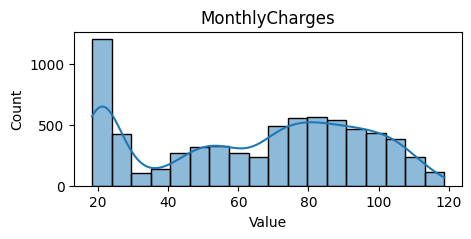

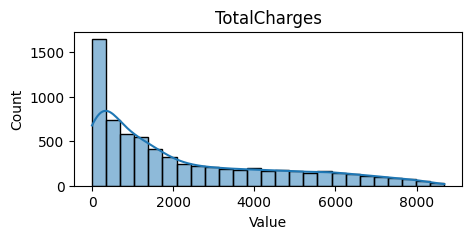

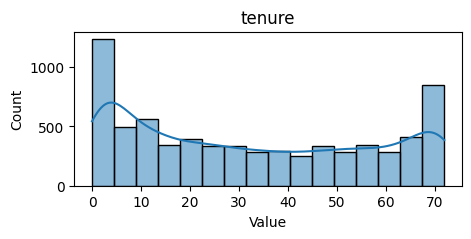

In [ ]:
col_numeric = ['MonthlyCharges', 'TotalCharges', 'tenure']
for i in col_numeric:
  plt.figure(figsize=(5, 2))
  sns.histplot(data=df2, x=i, kde=True)
  plt.title(i)
  plt.xlabel("Value")
  plt.ylabel("Count")
  plt.show()

##### Não foi possível identificar nenhum outlier que venha a impactar o bom andamento da análise

##Exploratory Data Analisys (EDA)


###Taxa de Churn

In [ ]:
taxa_churn = df2[df2['Churn'] == 'Yes'].shape[0] / customer.shape[0] * 100
print("Taxa de Churn:", taxa_churn)

Taxa de Churn: 26.536987079369588


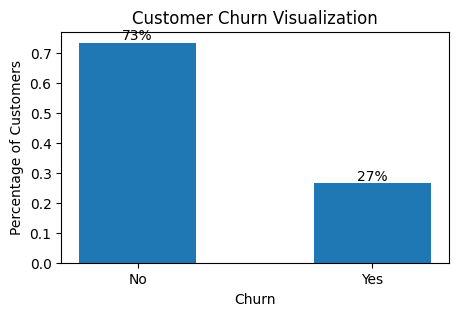

In [ ]:
churn_counts = df2['Churn'].value_counts(normalize=True)

plt.figure(figsize=(5, 3))

plt.bar(churn_counts.index, churn_counts.values, width=0.5)

for i in range(len(churn_counts)):
    plt.text(i, churn_counts.values[i], '{:.0f}%'.format(churn_counts.values[i]*100), ha='center', va='bottom')

plt.xlabel("Churn")
plt.ylabel("Percentage of Customers")
plt.title("Customer Churn Visualization")
plt.show()

##### A taxa de Churn verificada equivale a aproximadamente 27% (26,5% no total) de todo o dataset

Tratamento das colunas incluindo em "No" clientes que não possuem serviços de internet e de telefone

In [ ]:
df2.replace('No internet service','No',inplace=True)
df2.replace('No phone service','No',inplace=True)

## Visualização de dados
### Verificação variáveis que possam influenciar ou não na movimentação do cliente

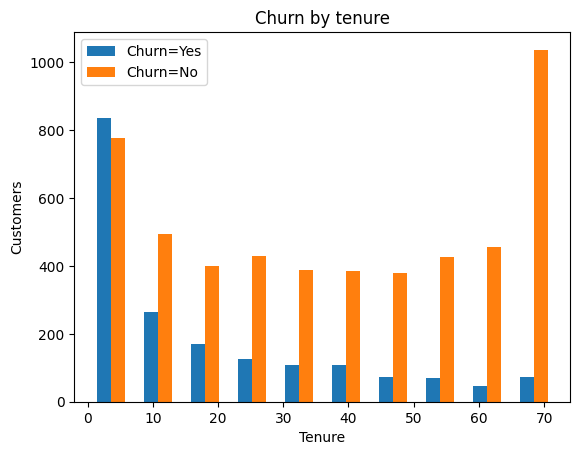

In [ ]:
plt.hist(x = [df2[df2['Churn']=='Yes']['tenure'], df2[df2['Churn']=='No']['tenure']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Tenure")
plt.ylabel("Customers")
plt.title("Churn by tenure")
plt.legend(['Churn=Yes', 'Churn=No'])
plt.show()

Observando a variável Tenure, percebe-se que uma tendência de clientes com até 1 ano de contrato a realizarem o Churn. À medida em que o tempo de contrato aumenta, os clientes tendem a cancelar menos os seus contratos

### Agrupando o tempo de contrato para Maior que um ano e Menor do que um ano

In [ ]:
df2['time_contract'] = df2['tenure'].apply(lambda x:'Less than one year' if x <= 12 else 'Greater than one year')

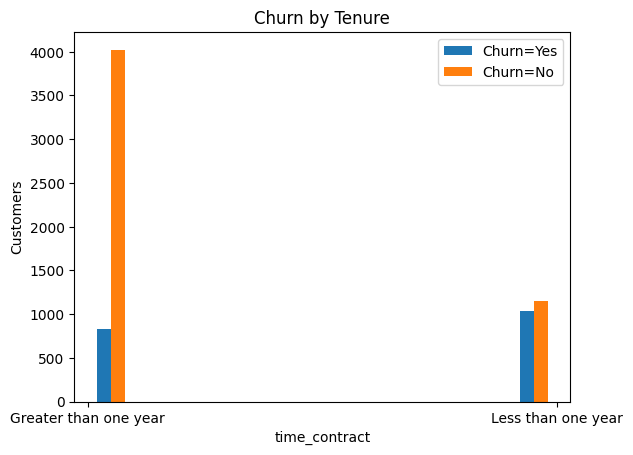

In [ ]:
plt.hist(x = [df2[df2['Churn']=='Yes']['time_contract'], df2[df2['Churn']=='No']['time_contract']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("time_contract")
plt.ylabel("Customers")
plt.title("Churn by Tenure")
plt.legend(['Churn=Yes', 'Churn=No'])
plt.show()

In [ ]:
print("Less than one year:", df2[df2['Churn']=='Yes']['time_contract'].value_counts(normalize=True)['Less than one year']*100, "%")
print("Greater than one year:", df2[df2['Churn']=='Yes']['time_contract'].value_counts(normalize=True)['Greater than one year']*100, "%")

Less than one year: 55.48421615837347 %
Greater than one year: 44.515783841626536 %


### Agrupando as faixas de idades para Senior e Not Senior

In [ ]:
df2['Age'] = df2['SeniorCitizen'].apply(lambda x: "Senior" if x == 1 else "Not Senior")

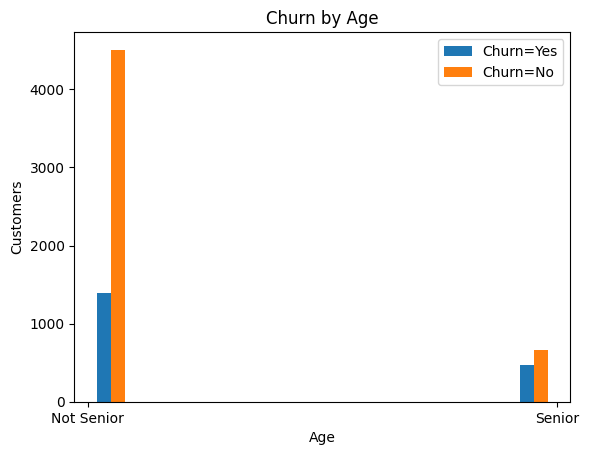

In [ ]:
plt.hist(x = [df2[df2['Churn']=='Yes']['Age'], df2[df2['Churn']=='No']['Age']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Age")
plt.ylabel("Customers")
plt.title("Churn by Age")
plt.legend(['Churn=Yes', 'Churn=No'])
plt.show()

##### Ao analisar o Churn por senioridade, percebeu-se que pessoas mais jovens tendem a permanecer com os contratos ativos

In [ ]:
print("Seniores:", df2[df2['Churn']=='Yes']['Age'].value_counts(normalize=True)['Senior']*100, "%")
print("Não Seniores:", df2[df2['Churn']=='Yes']['Age'].value_counts(normalize=True)['Not Senior']*100, "%")

Seniores: 25.468164794007492 %
Não Seniores: 74.53183520599251 %


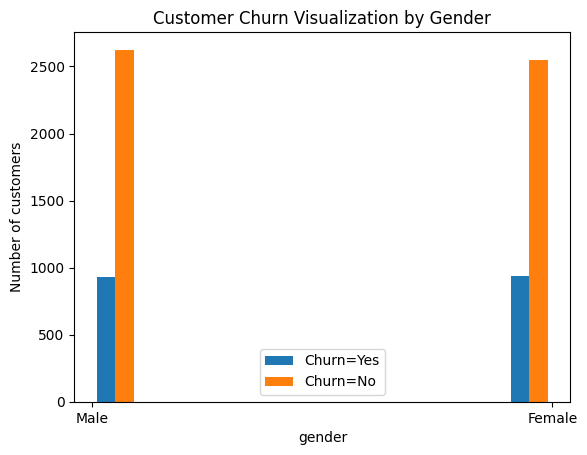

In [ ]:
plt.hist(x = [df2[df2['Churn']=='Yes']['gender'], df2[df2['Churn']=='No']['gender']], bins = 10, histtype = 'bar', rwidth = 0.8)
plt.xlabel("gender")
plt.ylabel("Number of customers")
plt.title("Customer Churn Visualization by Gender")
plt.legend(['Churn=Yes', 'Churn=No'])
plt.show()

##### Aparentemente o gênero não exerce influência para a permanência ou não dos clientes e, há uma boa distribuição entre Homens e Mulheres. Não se sabe a idade do dataset que está sendo analisado, mas não é existem e não são consideradas outras identidades de gênero na base

##### Agrupando por clientes Solteiros e sem Filho (Singles) x Clientes Casados Com filhos (Not Single)

In [ ]:
df2['Marital_Status'] = df2.apply(lambda x: "Single" if x['Partner'] == "No" and x['Dependents'] == "No" else "Not Single", axis=1)

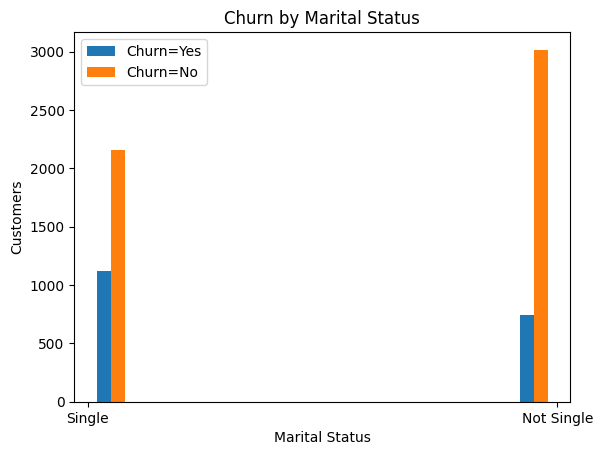

In [ ]:
plt.hist(x = [df2[df2['Churn']=='Yes']['Marital_Status'], df2[df2['Churn']=='No']['Marital_Status']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Marital Status")
plt.ylabel("Customers")
plt.title("Churn by Marital Status")
plt.legend(['Churn=Yes', 'Churn=No'])
plt.show()

##### **Clientes solteiros sem filhos tem maior probabilidade de cancelamento de contrato?:**

##### Foi criada uma uma coluna de Estado Civil baseada nas colunas "Partner" e "Dependents". Apesar de não ser muito expressiva a diferença, constatou-se que pessoas casadas com dependentes tendem a permanecer com o contrato ativo. Uma hipótese é de que pessoas com família constituída tendem a manter os serviços devido a uma rotina já estabelecida na família. Aqui pode ser uma boa estratégia segmentar o público por dados demográficos e oferecer serviços baseados na necessidade desses clientes

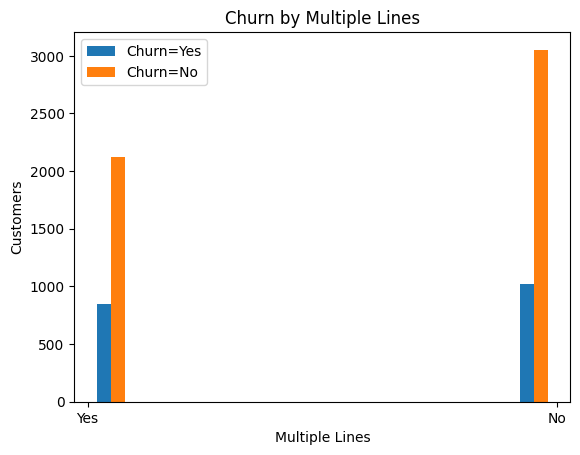

In [ ]:
plt.hist(x = [df2[df2['Churn']=='Yes']['MultipleLines'], df2[df2['Churn']=='No']['MultipleLines']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Multiple Lines")
plt.ylabel("Customers")
plt.title("Churn by Multiple Lines")
plt.legend(['Churn=Yes', 'Churn=No'])
plt.show()

#####  Aparentemente o fato dos clientes terem ou não múltiplas linhas telefônicas não implica no Churn ou permanência dos mesmos

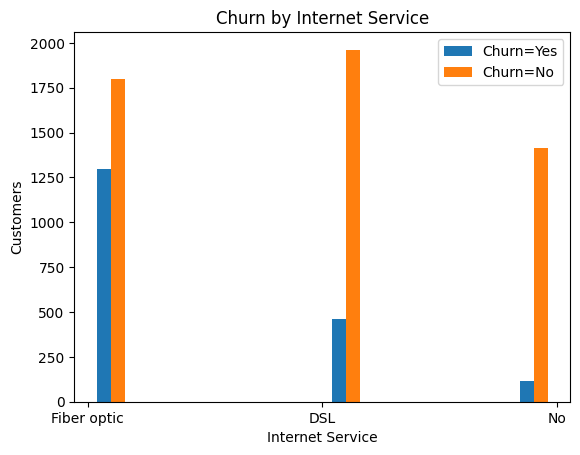

In [ ]:
plt.hist(x = [df2[df2['Churn']=='Yes']['InternetService'], df2[df2['Churn']=='No']['InternetService']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Internet Service")
plt.ylabel("Customers")
plt.title("Churn by Internet Service")
plt.legend(['Churn=Yes', 'Churn=No'])
plt.show()

In [ ]:
print("Fiber optic:", df2[df2['Churn']=='Yes']['InternetService'].value_counts(normalize=True)['Fiber optic']*100, "%")
print("DSL:", df2[df2['Churn']=='Yes']['InternetService'].value_counts(normalize=True)['DSL']*100, "%")

Fiber optic: 69.39539860888175 %
DSL: 24.558587479935795 %


Há um alto número de clientes com distribuição de internet Fibra ótica que fizeram o churn, representados em cerca de 60% do dataset, o que pode indicar que a distribuição desse serviço não está satisfatória

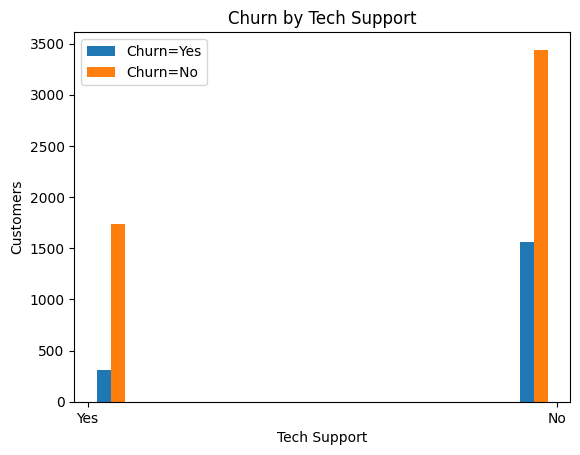

In [ ]:
plt.hist(x = [df2[df2['Churn']=='Yes']['TechSupport'], df2[df2['Churn']=='No']['TechSupport']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Tech Support")
plt.ylabel("Customers")
plt.title("Churn by Tech Support")
plt.legend(['Churn=Yes', 'Churn=No'])
plt.show()

In [ ]:
print("Has support:", df2[df2['Churn']=='Yes']['TechSupport'].value_counts(normalize=True)['Yes']*100, "%")
print("No support:", df2[df2['Churn']=='Yes']['TechSupport'].value_counts(normalize=True)['No']*100, "%")

Has support: 16.586409844836812 %
No support: 83.41359015516319 %


##### Há um alto número de clientes que não receberam suporte técnico que fizeram o churn, representando 83,4% da base.
##### Não dados suficientes para validar, mas há a hipótese de que existe uma dificuldade do cliente em utilizar os serviços ofertados e/ou alta necessidade de reparação técnica.
##### Entre aqueles que receberam suporte, a taxa de permanência é maior.
##### Em se tratando de serviços tecnológicos, o suporte técnico e bom atendimento do cliente pode aumentar seu nível de satisfação e assim contribuir para a sua permanência com o contrato

### Agrupando clientes que receberam e que não receberam suporte técnico e verificando por tipo Serviço de Internet

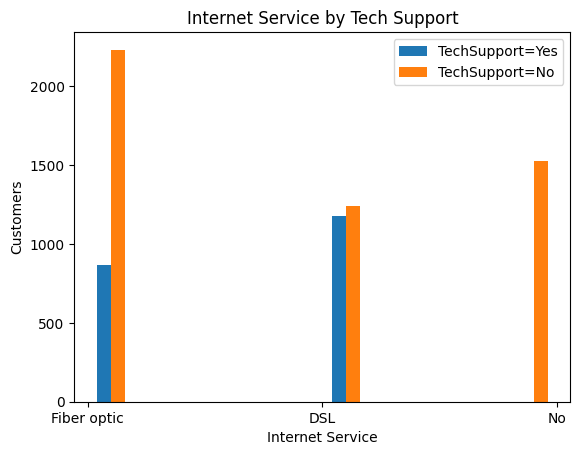

In [ ]:
plt.hist(x = [df2[df2['TechSupport']=='Yes']['InternetService'], df2[df2['TechSupport']=='No']['InternetService']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Internet Service")
plt.ylabel("Customers")
plt.title("Internet Service by Tech Support")
plt.legend(['TechSupport=Yes', 'TechSupport=No'])
plt.show()

Agrupando por tipo de internet fornecida e por clientes que recebem ou não suporte técnico, verifica-se uma grande quantidade de clientes com Fibra Ótica sem nenhum suporte, o que pode ajudar a verificar a hipótese anterior

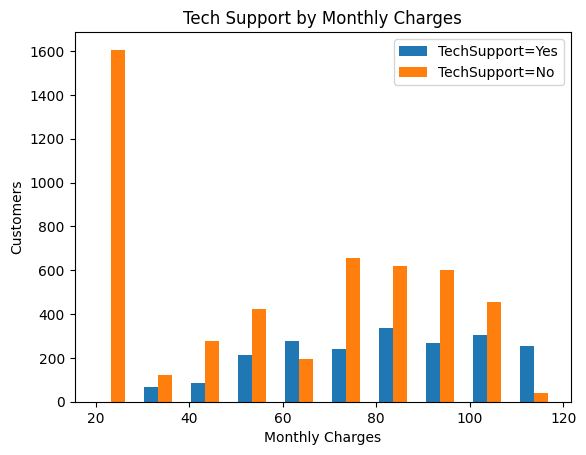

In [ ]:
plt.hist(x = [df2[df2['TechSupport']=='Yes']['MonthlyCharges'], df2[df2['TechSupport']=='No']['MonthlyCharges']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Monthly Charges")
plt.ylabel("Customers")
plt.title("Tech Support by Monthly Charges")
plt.legend(['TechSupport=Yes', 'TechSupport=No'])
plt.show()

É possível verificar que os clientes cujo pacote de serviços com custos mensais entre 50 e 110 (reais) não recebem suporte técnico. Essa quantidade pode ser expressiva e determinar a satisfação do cliente.

Segundo estudos publicados pela [CX Trend 2023](https://cev.fgv.br/noticia/maioria-dos-consumidores-estao-dispostos-a-pagar-mais-caro-em-uma-marca-que-oferece-uma-boa), a maioria dos consumidores estão dispostos a pagar mais caro em uma marca que oferece uma boa experiência. Desta forma, há a possibilidade de uma investigação mais aprofundada sobre a satisfação do cliente e sua percepção acerca prestação de serviços da empresa

### Agrupando por cliente Fidelidade (contratos a partir de 1 ano) e clientes Mensais (que realizam pagamentos mensais sem fidelização)

In [ ]:
df2['Contract'] = df2['Contract'].replace(['Two year', 'One year'], "Fidelity")
df2['Contract'] = df2['Contract'].replace('Month-to-month', "Monthly")
df2['Contract'].unique()

['Fidelity', 'Monthly']
Categories (2, object): ['Monthly', 'Fidelity']

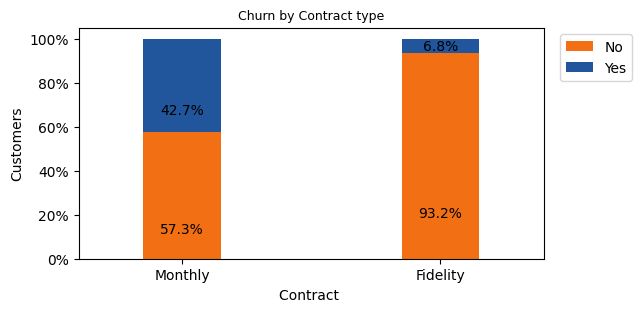

In [ ]:
colors = ['#f27013','#21569c']

contract_churn = df2.groupby(['Contract','Churn']).size().unstack()
contract_churn.rename(columns={1:'Yes', 0:'No'}, inplace=True)

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', figsize=(6,3),width=0.3, color=colors,stacked=True, rot=0)

plt.title('Churn by Contract type', fontsize=9)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='medium')
plt.xlabel('Contract \n', fontsize='medium')
plt.ylabel('Customers', fontsize='medium')
plt.xticks(fontsize='medium')
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x ,y = p.get_xy()
  ax.annotate('{:.1f}%'.format(height), (x + width/2, y + height*0.2), ha='center')

Verifica-se que um pouco mais da metade dos clientes que possuem contrato mensal tem uma tendência a cancelerarem seus contratos, enquanto aqueles com contratos de maior tempo, pernacecem. Aqui há a possibilidade de se trabalhar na oferta de contratos com tempo maior, tornando-os mais atrativos para os clientes

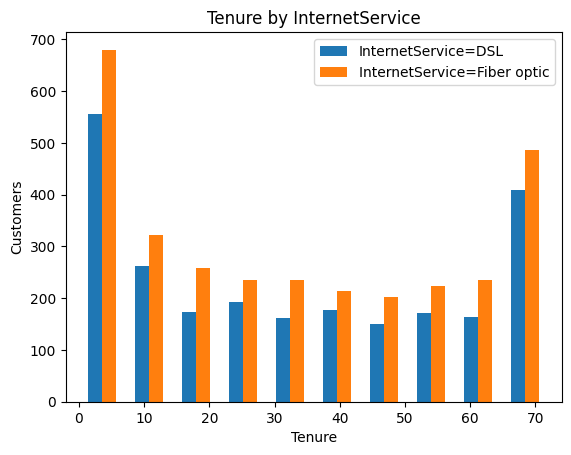

In [ ]:
plt.hist(x = [df2[df2['InternetService']=='DSL']['tenure'], df2[df2['InternetService']=='Fiber optic']['tenure']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Tenure")
plt.ylabel("Customers")
plt.title("Tenure by InternetService")
plt.legend(['InternetService=DSL', 'InternetService=Fiber optic'])
plt.show()

Aparentemente, se considerarmos somente o tipo de internet fornecida, ela não exerce grande influência no tempo de duração do contrato

### Agrupamento por métodos de pagamento por Automatic (Bank transfer e Credit card) e Eletronic (Electronic check e Mailed check)

In [ ]:
df2['PaymentMethod'] = df2['PaymentMethod'].replace(['Bank transfer (automatic)', 'Credit card (automatic)'], 'Automatic')
df2['PaymentMethod'] = df2['PaymentMethod'].replace(['Electronic check', 'Mailed check'], 'Eletronic')

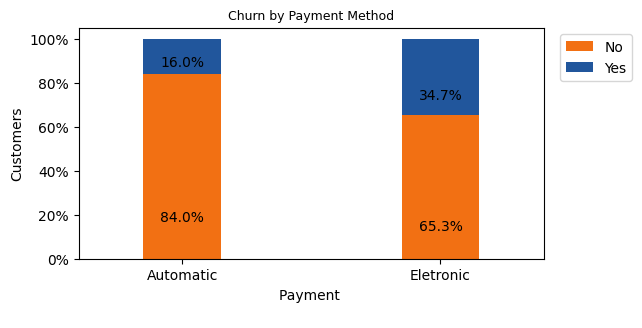

In [ ]:
payment_churn = df2.groupby(['PaymentMethod','Churn']).size().unstack()
payment_churn.rename(columns={1:'Yes', 0:'No'}, inplace=True)

ax = (payment_churn.T*100.0 / payment_churn.T.sum()).T.plot(kind='bar', figsize=(6,3),width=0.3, color=colors,stacked=True, rot=0)

plt.title('Churn by Payment Method', fontsize=9)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='medium')
plt.xlabel('Payment \n', fontsize='medium')
plt.ylabel('Customers', fontsize='medium')
plt.xticks(fontsize='medium')
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x ,y = p.get_xy()
  ax.annotate('{:.1f}%'.format(height), (x + width/2, y + height*0.2), ha='center')

É possível perceber que o método de pagamento exerce uma leve influência no Churn. Clientes que realizam pagamentos por meio de cheques e boletos eletrônicos tendem a cancelar os seus contratos

## Cálculo do churn de receita
#####  A sigla MRR significa Monthly Recurring Revenue, ou a receita recorrente mensal.

Também chamado churn de receita, o MRR churn mostra a receita que você perdeu devido aos cancelamentos ou rebaixamentos durante um período. MRR churn destaca todos os movimentos que afetam a receita, tanto os clientes que cancelam os serviços quanto aqueles que reduzem seus gastos com eles.

Esta métrica é importante porque mostra o impacto financeiro de cada cancelamento, considerando que cada cliente contribui de maneira diferente para o negócio.

Em serviços de assinatura, é comum ter diferentes categorias com preços variados, o que pode aumentar ou diminuir o valor médio que cada cliente paga.

Além disso, produtos comprados em maior ou menor quantidade e serviços adicionais também podem influenciar no preço final.

###Cálculo da Receita Recorrente Mensal (MRR) para cada cliente e depois Calculo do valor de MRR perdido devido ao churn

In [ ]:
df2['MRR'] = df2['MonthlyCharges']
total_mrr = df2['MRR'].sum()

churn_mrr = df2[df2['Churn'] == 'Yes']['MRR'].sum()

churn_rate = churn_mrr / total_mrr

#Total de receitas perdidas devido ao churn
total_revenue_lost = churn_rate * total_mrr
print("Total de receitas perdidas devido ao churn:", total_revenue_lost)

Total de receitas perdidas devido ao churn: 139130.85


O impacto com o churn dos clientes considerando toda a base é de uma perda de R$ 139.130,85 no valor total da receita (interpretado em reais por conta própria)

## Total de receitas perdidas devido ao churn nos primeiros 12 meses
### É filtrado para os primeiros 12 meses de contrato

In [ ]:
df2_12 = df2[df2['tenure'] <= 12]

churn_mrr_by_month = df2_12[df2_12['Churn'] == 'Yes'].groupby('tenure')['MRR'].sum()


total_mrr_by_month = df2_12.groupby('tenure')['MRR'].sum()

#Calculo da taxa de rotatividade para cada mês
churn_rate_by_month = churn_mrr_by_month / total_mrr_by_month

#Total de receitas perdidas devido ao churn por mês
revenue_lost_by_month = churn_rate_by_month * total_mrr_by_month
print("Perda de receita mês a mês em função do churn:")
print(revenue_lost_by_month)

#Perda total de receitas nos primeiros 12 meses
total_revenue_lost = revenue_lost_by_month.sum()
print("Total de receitas perdidas devido ao churn nos primeiros 12 meses:", total_revenue_lost)

Perda de receita mês a mês em função do churn:
tenure
0          NaN
1     22115.00
2      8108.70
3      6205.00
4      5862.75
5      4561.25
6      3043.40
7      3833.95
8      3182.65
9      3234.15
10     3607.35
11     2268.10
12     2931.95
Name: MRR, dtype: float64
Total de receitas perdidas devido ao churn nos primeiros 12 meses: 68954.25


Considerando os primeiros 12 meses (período com maior concentração de perda de clientes), o impacto na receita é de uma perda de R$ 68.954,25 somente no primeiro ano, o que representa 49,56% da receita perdida com o Churn

## Visualização das Interseções - [UpSet Graph](https://upset.app/)

"O UpSet fornece uma maneira eficiente de visualizar interseções de múltiplos conjuntos em comparação com as abordagens tradicionais, ou seja, o Diagrama de Venn."

In [ ]:
upset_customer = (df2[['Churn','PhoneService','InternetService', 'StreamingTV', 'StreamingMovies']]).copy()

upset_customer2= pd.get_dummies(upset_customer, columns=['InternetService'])

In [ ]:
upset_customer2 = upset_customer2.applymap(lambda x: True if x == 'Yes' else False if x == 'No' else x)

In [ ]:
upset_customer2 = upset_customer2.value_counts()

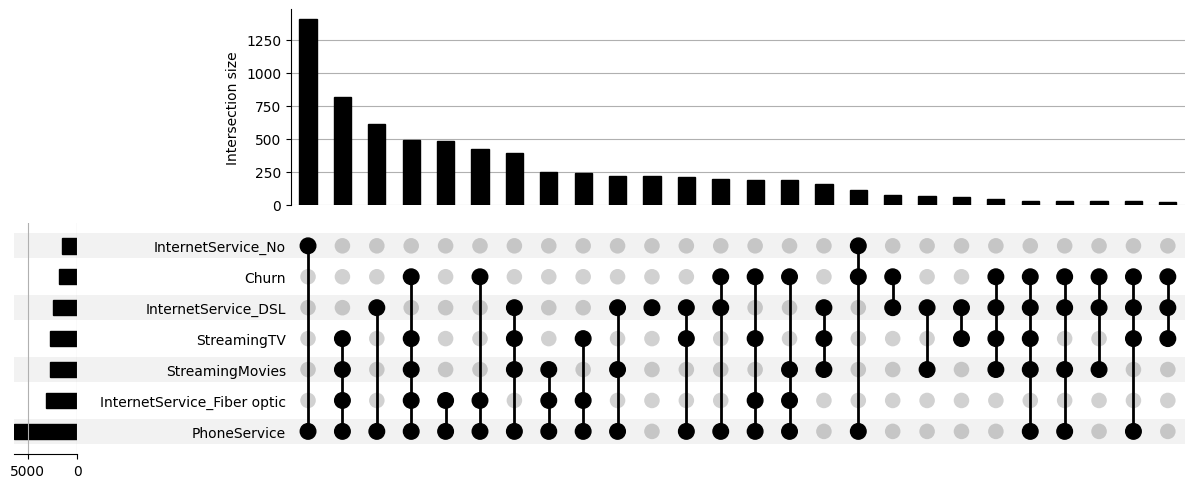

In [ ]:
plot(upset_customer2, sort_by='cardinality')
plt.show()

Foi utilizada a biblioteca UpSet para compreender a relação entre um conjunto de variáveis.

O Resultado demonstra que:
*   Clientes que possuem apenas serviços de telefonia tendem a permanecerem
*   Em segundo lugar, pessoas com a cesta de serviços que inclui TV, filmes, internet fibra ótica e serviço de telefonia também tendem a permanecer, mas estão muito próximos daqueles que possuem a mesma cesta e realizam o churn

## Modelagem

In [ ]:
df3 = customer.copy()

In [ ]:
df3 = df3.drop(columns=['gender'], axis=1)
df3.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
1,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No
2,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
3,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No
4,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes


A análise de sobrevivência é uma técnica estatística que consiste em analisar o tempo de vida dos indivíduos desde o momento em que entram no estudo até o momento em que ocorre o evento de interesse, evento que é definido à partida (geralmente definido como um fracasso), que pode ser a morte ou recaída de uma doença (para medicamentos) para casos aplicados à área da Saúde.

Sua principal aplicação é na medicina, envolvendo dados censurados. Porém, situações semelhantes ocorrem onde a aplicação destas técnicas é apropriada, especialmente em engenharia, ciências sociais, demografia, que podem ter como objeto de estudo, por exemplo: o tempo até que um carro tenha sua primeira avaria mecânica após ser vendido; o tempo desde que um criminoso sai da prisão até reincidir no crime ou mesmo a vida útil de uma máquina após a substituição de um componente mecânico.

## Estimador Kaplan-Meier
O Estimador Kaplan-Meier, também conhecido como estimador de limite de produto, pode ser usado para calcular probabilidades de sobrevivência para conjuntos de dados não paramétricos com múltiplas falhas e suspensões

Text(0.5, 0, 'time $t$')

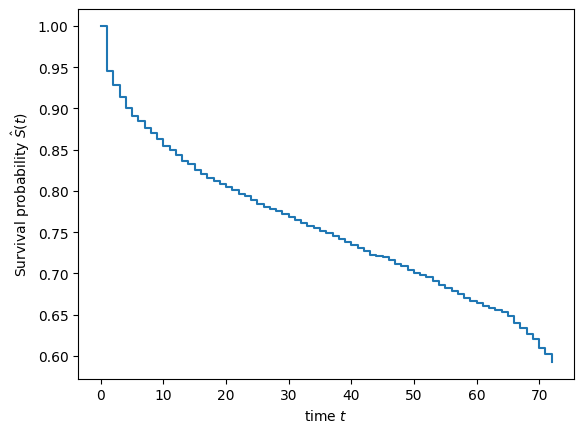

In [ ]:
time, survival_prob = kaplan_meier_estimator(df3["Churn"].map({'Yes':True, 'No': False}), df3["tenure"])
plt.step(time, survival_prob, where="post")
plt.ylabel("Survival probability $\hat{S}(t)$")
plt.xlabel("time $t$")

A curva estimada é uma função gradual, com etapas ocorrendo em momentos em que um ou mais indivíduos tem os contratos cancelados. No gráfico podemos perceber que a permanência dos clientes é maior ao ultrapassar os primeiros 12 meses de contrato.
Entre o 1º e o 2º mês há uma queda de aproximadamente 5% da possibilidade de sobreviência destes clientes, despertando a necessidade de uma análise mais aprofundada para quem se encontra em início de contrato.

### Para entender esse comportamento, consideramos outras variáveis para, a seguir, comparar as curvas sobrevivência

In [ ]:
col_cat = df3.select_dtypes(include="category").columns

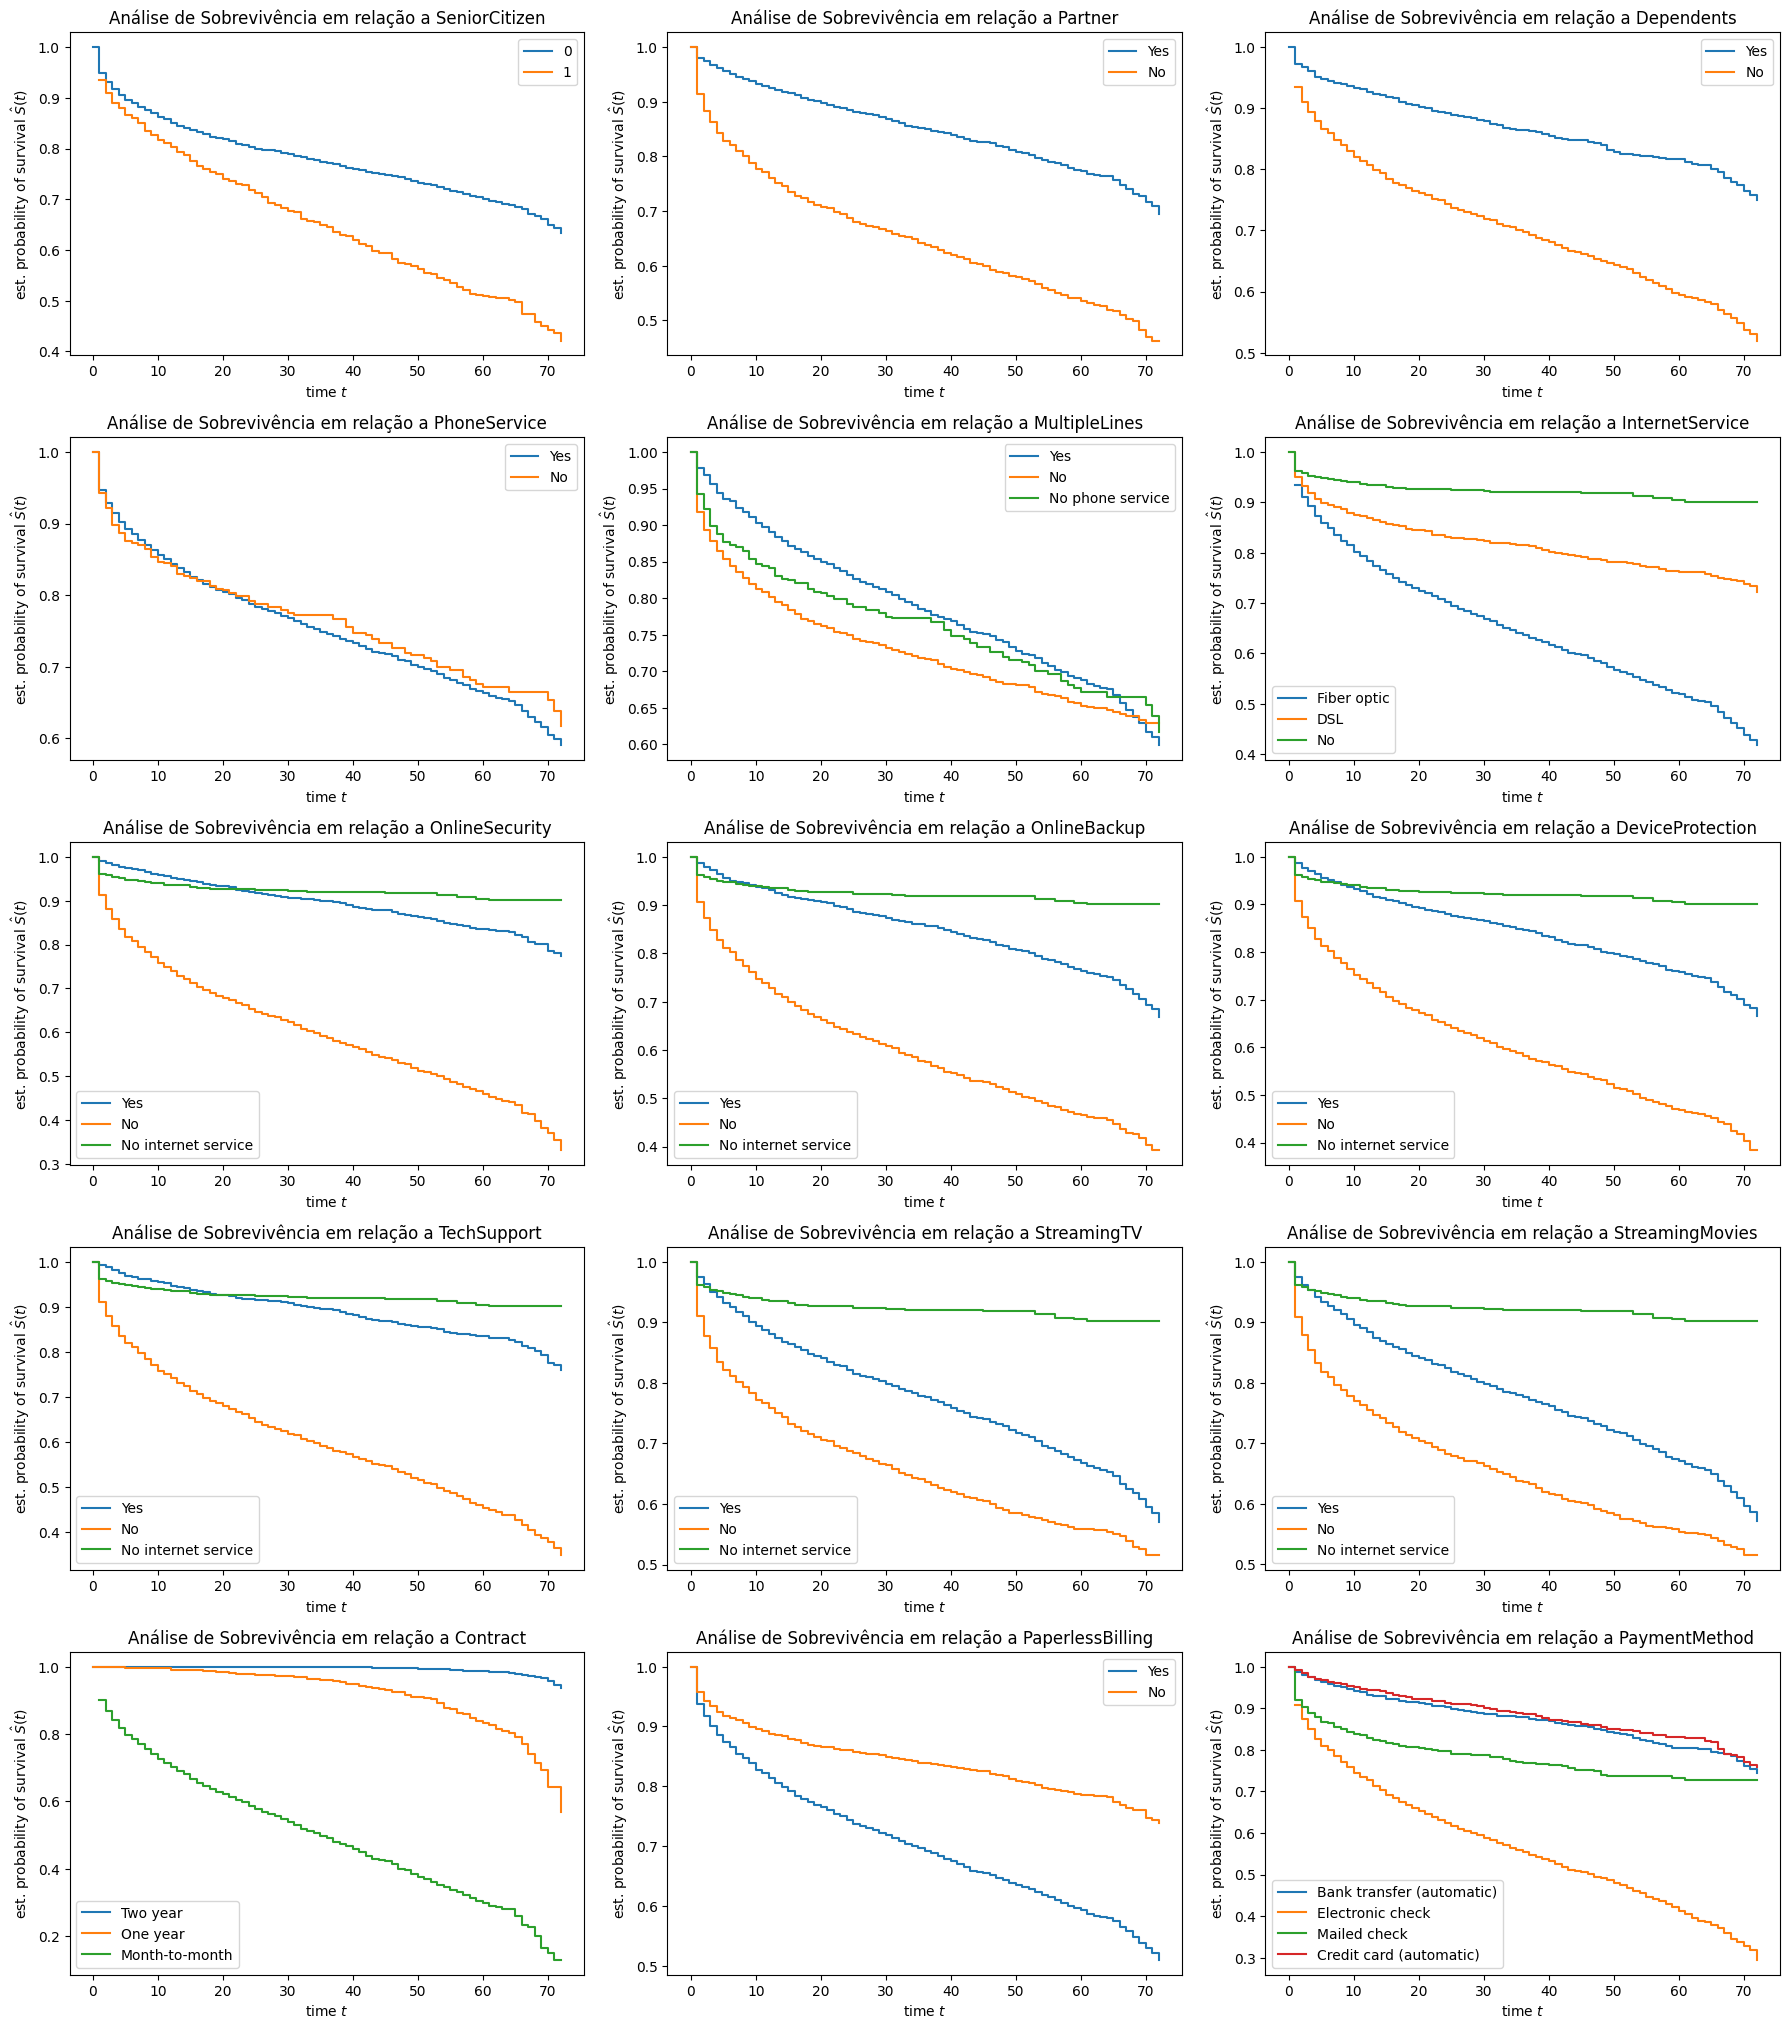

In [ ]:
plt.figure(figsize=(18, 24))

for i, column in enumerate(col_cat[:-1], 1):
    plt.subplot(6, 3, i)

    for category in df3[column].unique():
        mask = df3[column] == category
        time, survival_prob = kaplan_meier_estimator(
            df3["Churn"][mask].map({'Yes':True, 'No': False}), df3["tenure"][mask])
        plt.step(time, survival_prob, where="post", label=category)

    plt.title(f"Análise de Sobrevivência em relação a {column}")
    plt.ylabel("est. probability of survival $\hat{S}(t)$")
    plt.xlabel("time $t$")
    plt.legend(loc="best")
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## Modelo de Sobrevivência Multivariado - Cox Proportional Hazards Model

### Preparação dos dados
Para utilizar o modelo de riscos proporcionais de Cox, precisamos preparar os dados de forma que cada linha represente um cliente e cada coluna represente uma variável. Além disso, precisamos transformar as variáveis categóricas em variáveis dummy, ou seja, variáveis binárias que indicam a presença ou ausência de uma categoria.

A regressão de Cox constrói um modelo preditivo para dados de tempo até o evento. O modelo produz uma função de sobrevivência que prevê a probabilidade de o evento de interesse ter ocorrido em um determinado momento t para determinados valores das variáveis ​​preditoras. A forma da função de sobrevivência e os coeficientes de regressão para os preditores são estimados a partir de sujeitos observados; o modelo pode então ser aplicado a novos casos que possuem medidas para as variáveis ​​preditoras.

In [ ]:
from sksurv.preprocessing import OneHotEncoder

bool_col = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

dummy_df = df3[col_cat].copy()

dummy_df['SeniorCitizen'] = dummy_df['SeniorCitizen'].astype(float)

for col in bool_col:
    dummy_df[col] = dummy_df[col].map({'Yes': 1, 'No': 0}).astype(float)

bool_col = list(set(col_cat) - set(bool_col) - set(['SeniorCitizen']))

dummy_df = pd.get_dummies(dummy_df, columns=bool_col, dtype=float)
dummy_df.head()

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   float64
 1   Partner                                  7043 non-null   float64
 2   Dependents                               7043 non-null   float64
 3   PhoneService                             7043 non-null   float64
 4   PaperlessBilling                         7043 non-null   float64
 5   Churn                                    7043 non-null   float64
 6   StreamingTV_No                           7043 non-null   float64
 7   StreamingTV_No internet service          7043 non-null   float64
 8   StreamingTV_Yes                          7043 non-null   float64
 9   InternetService_DSL                      7043 non-null   float64
 10  InternetService_Fiber optic              7043 no

In [ ]:
#Calculo da matriz de correlação
correlation_matrix = dummy_df.corr()

#Obtém as colunas a serem removidas (correlação igual a 1)
remove_cols = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) == 1:
            column = correlation_matrix.columns[j]
            remove_cols.append(column)


dummy_df = dummy_df.drop(columns=remove_cols)
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   float64
 1   Partner                                  7043 non-null   float64
 2   Dependents                               7043 non-null   float64
 3   PhoneService                             7043 non-null   float64
 4   PaperlessBilling                         7043 non-null   float64
 5   Churn                                    7043 non-null   float64
 6   StreamingTV_No                           7043 non-null   float64
 7   StreamingTV_No internet service          7043 non-null   float64
 8   StreamingTV_Yes                          7043 non-null   float64
 9   InternetService_DSL                      7043 non-null   float64
 10  InternetService_Fiber optic              7043 no

### Divisão dos dados em treino e teste

In [ ]:
X = dummy_df.drop('Churn', axis=1)
df3['Churn'] = df3['Churn'].map({'Yes':True, 'No': False})
y = df3[['Churn', 'tenure']].to_records(index=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 30), (2113, 30), (4930,), (2113,))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4930 entries, 1695 to 860
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            4930 non-null   float64
 1   Partner                                  4930 non-null   float64
 2   Dependents                               4930 non-null   float64
 3   PhoneService                             4930 non-null   float64
 4   PaperlessBilling                         4930 non-null   float64
 5   StreamingTV_No                           4930 non-null   float64
 6   StreamingTV_No internet service          4930 non-null   float64
 7   StreamingTV_Yes                          4930 non-null   float64
 8   InternetService_DSL                      4930 non-null   float64
 9   InternetService_Fiber optic              4930 non-null   float64
 10  MultipleLines_No                         4930 non-n

### Treinamento do modelo

In [ ]:
from sklearn import set_config
from sksurv.linear_model import CoxPHSurvivalAnalysis

set_config(display="text")  #mostra a representação textual dos estimadores

estimator = CoxPHSurvivalAnalysis()
estimator.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sksurv/linear_model/coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=8.28267e-19): result may not be accurate.
  delta = solve(
/usr/local/lib/python3.10/dist-packages/sksurv/linear_model/coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=1.06735e-17): result may not be accurate.
  delta = solve(
/usr/local/lib/python3.10/dist-packages/sksurv/linear_model/coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=9.94784e-20): result may not be accurate.
  delta = solve(
/usr/local/lib/python3.10/dist-packages/sksurv/linear_model/coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=1.80453e-17): result may not be accurate.
  delta = solve(
/usr/local/lib/python3.10/dist-packages/sksurv/linear_model/coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=4.40278e-18): result may not be accurate.
  delta = solve(
/usr/local/lib/python3.10/dist-packages/sksurv/linear_model/coxph.py:449: LinAlgWarning: Ill-conditioned matri

CoxPHSurvivalAnalysis()

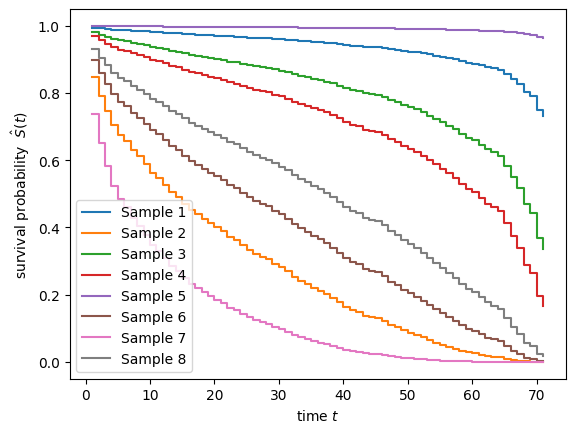

In [ ]:
pred_surv = estimator.predict_survival_function(X_test[:8])
time_points = np.arange(1, 72)
for i, surv_func in enumerate(pred_surv):
    plt.step(time_points, surv_func(time_points), where="post",
             label="Sample %d" % (i + 1))
plt.ylabel("survival probability  $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

In [ ]:
X_test_samples = X_test[:8]
y_test_samples = y_test[:8]

##### Para testar o modelo, selecionamos 8 elementos do conjunto de testes e realizamos apredição dos mesmos. É possivel observar que o "Sample 8" é o que mais se aproxima de um comportamento de sobrevivência linear e, quanto maior o tenure, menor a probabilidade de sobrevivência. Este comportamento pode indicar que o cliente precisará de alguma intervenção para evitar o churn ao longo do tempo.
##### Na literatura, não foi encontrado um método direto para estimar o número de conjuntos (sample) utilizados. No entanto, existem algumas referências para as áreas médicas ao utilizar o modelo, que podem ser encontradas nos links a seguir:
*   [Sample Size - Survival Analysis](https://www.quesgen.com/SSSurvival.php)
*   [Sample Size Calculators for designing clinical research](https://sample-size.net/sample-size-survival-analysis/)



### Avaliação do modelo
Nossos dados de teste geralmente estão sujeitos à censura, assim como dados médicos, portanto, métricas como erro médio quadrático ou correlação são inadequadas. Em vez disso, utilizamos uma generalização da área sob a curva da característica de operação do receptor (ROC) chamada índice de concordância de Harrell ou c-index.

A interpretação é idêntica à métrica tradicional da área sob a curva ROC para classificação binária:

*   um valor de 0,5 indica um modelo aleatório,
*   um valor de 1,0 indica um modelo perfeito,
*   um valor de 0,0 indica um modelo perfeitamente incorreto.



In [ ]:
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(X_train)
result = concordance_index_censored(
    y_train['Churn'], y_train['tenure'], prediction)

result[0]

0.8629872836715571

In [ ]:
prediction = estimator.predict(X_test)
result = concordance_index_censored(
    y_test['Churn'], y_test['tenure'], prediction)

result[0]

0.8722393280323001

Na avaliação do modelo, obtivemos um c-index de 86,29% para os dados de treinamento e 87,22% para os dados de teste, indicando que o modelo possui uma boa capacidade de prever o tempo de ocorrência do evento.

### Explicabilidade do modelo
##### O modelo de análise de sobrevivência foi treinado considerando todas as variáveis disponíveis no conjunto de dados.
##### No entanto, é possível que algumas variáveis não sejam relevantes para a previsão do tempo de ocorrência do evento. Para identificar quais variáveis individualmente são as melhores preditoras de risco de churn, é possível treinar o modelo de riscos proporcionais de Cox para cada variável e comparar o c-index de cada modelo

In [ ]:
def score_features(X, y):
    n_features = X.shape[1]
    score = np.empty(n_features)
    m = CoxPHSurvivalAnalysis()
    for j in range(n_features):
        Xj = X[:, j:j+1]
        m.fit(Xj, y)
        score[j] = m.score(Xj, y)
    return score


score = score_features(X_train.values, y_train)
pd.Series(score, index=X_train.columns).sort_values(ascending=False)

Contract_Month-to-month                    0.759711
TechSupport_No                             0.678630
OnlineSecurity_No                          0.677150
OnlineBackup_No                            0.664813
Contract_Two year                          0.659729
DeviceProtection_No                        0.656938
PaymentMethod_Electronic check             0.641078
Partner                                    0.629097
TechSupport_Yes                            0.611473
InternetService_Fiber optic                0.610044
OnlineSecurity_Yes                         0.609992
StreamingTV_No                             0.601865
StreamingMovies_No                         0.601186
Contract_One year                          0.599983
OnlineBackup_Yes                           0.597655
DeviceProtection_Yes                       0.589780
Dependents                                 0.583554
PaymentMethod_Credit card (automatic)      0.574352
PaperlessBilling                           0.571197
PaymentMetho

##### A partir da análise proposta, é possível identificar que as variáveis "Contract", "PaymentMethod", "OnlineSecurity", "TechSupport", "InternetService" e "OnlineBackup" possuem os melhores c-index e, portanto, se destacam como as melhores preditoras de risco para churn. Nestes casos, pode ser interessante utilizar estas variáveis para novas modelagens para explorar melhor a importância e peso de cada uma delas na movimentação do cliente.


##### Observa-se ainda que as variáveis "MultipleLines_No phone service", "PhoneService" e "PaymentMethod_Mailed check" apresentaram um c-index muito próximo do valor 0,5 o que, baseado na literaratura, poderia ser descartadas no modelo de forma a simplificar a análise. O fato de a variável PaymentMethod_Mailed check não ser uma boa preditora de risco de churn sugere ter relação com o fato de haver um comportamento de churn maior nos dois primeiros meses

## Estimativa de impacto de intervenções
### Estimativa do impacto ao realizar intervenções na proposta de contratos de longo prazo

In [ ]:
df_contrato_longo_prazo = df3[(df3['Contract'] != 'One year') | (df3['Contract'] != 'Two year')]
df_contrato_longo_prazo = df_contrato_longo_prazo[df_contrato_longo_prazo['Churn'] == True]
df_contrato_longo_prazo = df_contrato_longo_prazo[['tenure', 'MonthlyCharges', 'TotalCharges']]
ticket_medio_df_contrato_longo_prazo = df_contrato_longo_prazo['MonthlyCharges'].mean()

ticket_medio_df_contrato_longo_prazo

74.44133226324237

In [ ]:
impacto_longo_prazo = df_contrato_longo_prazo.count()
impacto_longo_prazo

tenure            1869
MonthlyCharges    1869
TotalCharges      1869
dtype: int64

In [ ]:
impacto_longo_prazo = ticket_medio_df_contrato_longo_prazo * (impacto_longo_prazo * 0.05)

impacto_longo_prazo

tenure            6956.5425
MonthlyCharges    6956.5425
TotalCharges      6956.5425
dtype: float64

##Estimativa de impacto ao realizar intervenções na proposta de pessoas com família


In [ ]:
df3['Marital_Status'] = df3.apply(lambda x: "Single" if x['Partner'] == "No" and x['Dependents'] == "No" else "Family", axis=1)

In [ ]:
df_familia = df3[df3['Marital_Status'] == 'Family']
df_familia = df_familia[df_familia['Churn'] == True]
df_familia = df_familia[['tenure', 'MonthlyCharges', 'TotalCharges']]
ticket_medio_familia = df_familia['MonthlyCharges'].mean()
ticket_medio_familia

78.31796246648793

In [ ]:
contratos_familia = df_familia.count()
contratos_familia

tenure            746
MonthlyCharges    746
TotalCharges      746
dtype: int64

In [ ]:
impacto_familia = ticket_medio_familia * (contratos_familia * 0.05)
impacto_familia

tenure            2921.26
MonthlyCharges    2921.26
TotalCharges      2921.26
dtype: float64

## Sugestões de próximas ações:
Como proposta de melhorias e continuidade deste trabalho, para um prazo de curto prazo sugiro aprofundarem fatores causadores do Churn que pode ser a experiência do cliente, do valor para pacotes de serviços e entrega dos serviços.

## Referências

*  Bradburn, M., Clark, T., Love, S. et al. Survival Analysis Part III: Multivariate data analysis – choosing a model and assessing its adequacy and fit. Br J Cancer 89, 605–611 (2003). https://doi.org/10.1038/sj.bjc.6601120

*  FIA. Churn Rate: o que é e como reter mais cliente. (2020). https://fia.com.br/blog/churn-rate/
*   Magul, Eudito. Churn Customers: Survival Analysis Applying R. (2023). https://medium.com/@euditomagul/churn-customers-survival-analysis-applying-r-fe09df4c93cc
*   Goel MK, Khanna P, Kishore J. Understanding survival analysis: Kaplan-Meier estimate. Int J Ayurveda Res. 2010 Oct;1(4):274-8. doi: 10.4103/0974-7788.76794. PMID: 21455458; PMCID: PMC3059453. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3059453/#:~:text=may%20become%20small.-,The%20Kaplan%2DMeier%20estimate%20is%20the%20simplest%20way%20of%20computing,associated%20with%20subjects%20or%20situations.&text=For%20each%20time%20interval%2C%20survival,number%20of%20patients%20at%20risk



